<a href="https://colab.research.google.com/github/Alecia113/NLP-Ex/blob/main/L6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E1.  When using HMM to solve POS Tagging problem, what is (1) the hidden state, (2) an observation, (3) a transition probability example, (4) an emission probability example
In the HMM example mentioned in the lecture, **hidden state** is the weather, **observation** is clothes that the person wears, **a transition probability example** is the probability that today is rainy if yesterday was cloudy, **an emission probability example** is the probability that a person wears a shirt if it is cloudy.

E1. 当使用HMM解决POS标签问题时，什么是（1）隐藏状态，（2）观察，（3）过渡概率例子，（4）排放概率例子？
在讲座中提到的HMM例子中，隐藏状态是天气，观察是人穿的衣服，过渡概率例子是如果昨天是阴天，今天是下雨的概率，排放概率例子是如果是阴天，人穿衬衫的概率

Your answer:

## E2. Testing with the new sentence

In this exercise, you are to classify part-of-speech(pos) tags on user-defined sentences using the Bi-LSTM model trained right before the exercise. (You can call functions and use the variables directly, just assume this part is the last part of Bi-LSTM based POS Tagger code). You should complete a function which returns the POS tags list for the input. **Note**: Your output should be "cut off" to the actual length of each sentence.

## E2. 用新句子测试

在这个练习中，你要用练习前训练好的Bi-LSTM模型对用户定义的句子进行语音部分（pos）标记分类。你可以直接调用函数和使用变量，只是假设这部分是基于Bi-LSTM的POS标签的最后一部分代码）。你应该完成一个函数，返回输入的POS标签列表。**注意**。你的输出应该被 "截断 "到每个句子的实际长度。

In [28]:
import nltk

# Downloading required corpus
nltk.download('punkt')
nltk.download('brown')

from nltk import word_tokenize
from nltk.corpus import brown
import pprint
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [4]:
 # Define regular expression patterns
 patterns = [
        (r'.*ing$', 'VBG'),               # gerunds
        (r'.*ed$', 'VBD'),                # simple past
        (r'.*es$', 'VBZ'),                # 3rd singular present
        (r'.*ould$', 'MD'),               # modals
        (r'.*\'s$', 'NN$'),               # possessive nouns
        (r'.*s$', 'NNS'),                 # plural nouns
        (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
        (r'.*', 'NN')                     # nouns (default)
    ]

In [58]:
# Pretagged training data
brown_tagged_sents = brown.tagged_sents()

print(brown_tagged_sents)

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [ ]:
# Build regular expression tagger using the defined patterns
regexp_tagger = nltk.RegexpTagger(patterns)

# Print one of the sentences
print(brown_sents[3])
# Print one of the tagged sentences
print(regexp_tagger.tag(brown_sents[3]))

In [59]:
# Import HMM module
from nltk.tag import hmm

# Setup a trainer with default(None) values
# And train with the data
trainer = hmm.HiddenMarkovModelTrainer()
trained_tagger = trainer.train_supervised(brown_tagged_sents)

print (trained_tagger)
# Prints the basic data about the tagger

tokens = word_tokenize("This race is awesome, I want to race too")
print(trained_tagger.tag(tokens))



<HiddenMarkovModelTagger 472 states and 56057 output symbols>
[('This', 'DT'), ('race', 'NN'), ('is', 'BEZ'), ('awesome', 'JJ'), (',', ','), ('I', 'PPSS'), ('want', 'VB'), ('to', 'TO'), ('race', 'VB'), ('too', 'QL')]


<HiddenMarkovModelTagger 472 states and 56057 output symbols>
[('This', 'DT'), ('race', 'NN'), ('is', 'BEZ'), ('awesome', 'JJ'), (',', ','), ('I', 'PPSS'), ('want', 'VB'), ('to', 'TO'), ('race', 'VB'), ('too', 'QL')]


In [61]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

nltk.download('treebank')
from nltk.corpus import treebank

import numpy as np
from sklearn.model_selection import train_test_split
 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [64]:
# Retrieve tagged sentences from treebank corpus
tagged_sentences = nltk.corpus.treebank.tagged_sents()
test_samples = [
  word_tokenize("This race is awesome, I want to race too."),
  word_tokenize("That race is silly, I do not want to race.")
] #已经分完了
print(tagged_sentences[0])
#print("Tagged sentences: ", len(tagged_sentences))
#print("Tagged words:", len(nltk.corpus.treebank.tagged_words()))
#tagged_words(): list of (str,str) tuple

AttributeError: ignored

In [63]:
sentences, sentence_tags =[], [] 
for tagged_sentence in test_samples:
    #The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, 
    #and then the second item in each passed iterator are paired together etc.
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    sentence_tags.append(np.array(tags))
 
print(sentences[5])
print(sentence_tags[5])

ValueError: ignored

In [57]:
test_samples = [
    word_tokenize("This race is awesome, I want to race too."),
    word_tokenize("That race is silly, I do not want to race.")
] #已经分完了
token_sequences = []
# Please Complete this part
regexp_tagger = nltk.RegexpTagger(patterns) ## 使用定义的模式建立正则表达式标记器
#for i in test_sample

print(regexp_tagger.tag(test_samples[0]))


[('This', 'NNS'), ('race', 'NN'), ('is', 'NNS'), ('awesome', 'NN'), (',', 'NN'), ('I', 'NN'), ('want', 'NN'), ('to', 'NN'), ('race', 'NN'), ('too', 'NN'), ('.', 'NN')]


**Sample output (Only for format reference)**
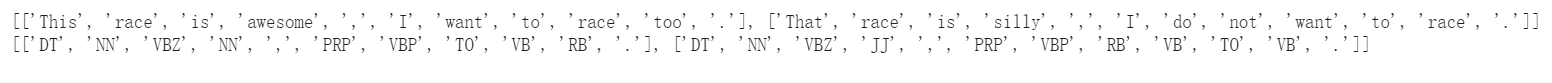

In [3]:
test_samples = [
    word_tokenize("This race is awesome, I want to race too."),
    word_tokenize("That race is silly, I do not want to race.")
]

def test_model(test_samples):
    token_sequences = []
    regexp_tagger = nltk.RegexpTagger(patterns)
    # Please Complete this part
    tokens = word_tokenize(raw)

  print(regexp_tagger.tag(tokens))


    return token_sequences


print(test_samples)
print(test_model(test_samples))

[['This', 'race', 'is', 'awesome', ',', 'I', 'want', 'to', 'race', 'too', '.'], ['That', 'race', 'is', 'silly', ',', 'I', 'do', 'not', 'want', 'to', 'race', '.']]
[]


**Sample output (Only for format reference)**
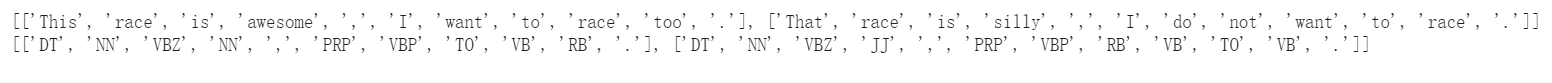

In [65]:
import nltk
import sys
nltk.download('brown')

from nltk.corpus import brown
from nltk.corpus import treebank

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [6]:

brown_tags_words = []
brown_tagged_sents = brown.tagged_sents()

for sent in brown_tagged_sents:
    # sent is a list of word/tag pairs
    # add START/START at the beginning
    brown_tags_words.append( ("START", "START") )
    # then all the tag/word pairs for the word/tag pairs in the sentence.
    # shorten tags to 2 characters each
    brown_tags_words.extend([ (tag[:2], word) for (word, tag) in sent ])
    # then END/END
    brown_tags_words.append( ("END", "END") )

# conditional frequency distribution
cfd_tagwords = nltk.ConditionalFreqDist(brown_tags_words)
# conditional probability distribution
cpd_tagwords = nltk.ConditionalProbDist(cfd_tagwords, nltk.MLEProbDist)

print("The probability of an adjective (JJ) being 'new' is", cpd_tagwords["JJ"].prob("new"))
print("The probability of a verb (VB) being 'duck' is", cpd_tagwords["VB"].prob("duck"))

# Estimating P(ti | t{i-1}) from corpus data using Maximum Likelihood Estimation (MLE):
# P(ti | t{i-1}) = count(t{i-1}, ti) / count(t{i-1})
brown_tags = [tag for (tag, word) in brown_tags_words ]

# make conditional frequency distribution:
# count(t{i-1} ti)
cfd_tags= nltk.ConditionalFreqDist(nltk.bigrams(brown_tags))
# make conditional probability distribution, using
# maximum likelihood estimate:
# P(ti | t{i-1})
cpd_tags = nltk.ConditionalProbDist(cfd_tags, nltk.MLEProbDist)

print("If we have just seen 'DT', the probability of 'NN' is", cpd_tags["DT"].prob("NN"))
print( "If we have just seen 'VB', the probability of 'JJ' is", cpd_tags["VB"].prob("DT"))
print( "If we have just seen 'VB', the probability of 'NN' is", cpd_tags["VB"].prob("NN"))

The probability of an adjective (JJ) being 'new' is 0.01472344917632025
The probability of a verb (VB) being 'duck' is 6.042713350943527e-05
If we have just seen 'DT', the probability of 'NN' is 0.5057722522030194
If we have just seen 'VB', the probability of 'JJ' is 0.016885067592065053
If we have just seen 'VB', the probability of 'NN' is 0.10970977711020183


In [191]:
sentence[wordindex]

['That',
 'race',
 'is',
 'silly',
 ',',
 'I',
 'do',
 'not',
 'want',
 'to',
 'race',
 '.']

In [194]:
prob

0.0

In [201]:
#currbest = max(this_viterbi.keys(), key = lambda tag: this_viterbi[ tag ])
this_viterbi.keys()#dict_keys
this_viterbi[ tag ] #float -=0.0

0.0

In [217]:
for i in range(wordindex):
  print(i)

0
1


In [220]:
for wordindex in range(len(sentence[l])):
  print(wordindex)

0
1
2
3
4
5
6
7
8
9
10


In [260]:
for word in sentence[l]:
  print(word)

That
race
is
silly
,
I
do
not
want
to
race
.


In [269]:
this_backpointer[ tag ]

'CC'

In [8]:
import nltk
import sys
nltk.download('brown')

from nltk.corpus import brown
from nltk.corpus import treebank
import nltk

# Downloading required corpus
nltk.download('punkt')
nltk.download('brown')

from nltk import word_tokenize
from nltk.corpus import brown
import pprint
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [24]:
#要的
token_sequence = []
distinct_tags = set(brown_tags) #词性库
sentence =[
    word_tokenize("This race is awesome, I want to race too."),
    word_tokenize("That race is silly, I do not want to race.")
]
sentlen = len(sentence)

# viterbi:
# for each step i in 1 .. sentlen,
# store a dictionary
# that maps each tag X
# to the probability of the best tag sequence of length i that ends in X
viterbi = [ ]

# backpointer:
# for each step i in 1..sentlen,
# store a dictionary
# that maps each tag X
# to the previous tag in the best tag sequence of length i that ends in X
backpointer = [ ]

first_viterbi = { }
first_backpointer = { }
for tag in distinct_tags:
    # don't record anything for the START tag
    if tag == "START": continue
    first_viterbi[ tag ] = cpd_tags["START"].prob(tag) * cpd_tagwords[tag].prob( sentence[0][0] )
    first_backpointer[ tag ] = "START"

print(first_viterbi)
print(first_backpointer)
    
viterbi.append(first_viterbi)
backpointer.append(first_backpointer)

currbest = max(first_viterbi.keys(), key = lambda tag: first_viterbi[ tag ])
print( "Word", "'" + sentence[0][0] + "'", "current best two-tag sequence:", first_backpointer[ currbest], currbest)
# print( "Word", "'" + sentence[0] + "'", "current best tag:", currbest)


for l in range(len(sentence)):

  for wordindex in range(len(sentence[l])):
      this_viterbi = { }
      this_backpointer = { }
      prev_viterbi = viterbi[-1]
      
      for tag in distinct_tags:
          # don't record anything for the START tag
          if tag == "START": continue
          for word in sentence[l]:
            best_previous = max(prev_viterbi.keys(),
                                key = lambda prevtag: prev_viterbi[ prevtag ] * cpd_tags[prevtag].prob(tag) * cpd_tagwords[tag].prob(word))

            this_viterbi[ tag ] = prev_viterbi[ best_previous] * \
                cpd_tags[ best_previous ].prob(tag) * cpd_tagwords[ tag].prob(word)
            this_backpointer[ tag ] = best_previous
      currbest = max(this_viterbi.keys(), key = lambda tag: this_viterbi[ tag ])
      print( "Word", "'" + word + "'", "current best two-tag sequence:", this_backpointer[ currbest], currbest)
          #print( "Word", "'" + sentence[word] + "'", "current best tag:", currbest)
          # done with all tags in this iteration
          # so store the current viterbi step
      viterbi.append(this_viterbi)
      backpointer.append(this_backpointer)


{'UH': 0.0, '(': 0.0, 'RN': 0.0, 'JJ': 0.0, 'DO': 0.0, '--': 0.0, '(-': 0.0, '*-': 0.0, 'PP': 0.0, 'WR': 0.0, 'HV': 0.0, 'EX': 0.0, 'CC': 0.0, ')-': 0.0, 'END': 0.0, 'NI': 0.0, 'AP': 0.0, '``': 0.0, '.': 0.0, 'NN': 0.0, 'WP': 0.0, 'RB': 0.0, 'CD': 0.0, "''": 0.0, '.-': 0.0, '*': 0.0, ':-': 0.0, 'DT': 0.0033218181276236437, "'": 0.0, 'BE': 0.0, ':': 0.0, 'WD': 0.0, 'FW': 0.0, 'WQ': 0.0, 'RP': 0.0, 'MD': 0.0, 'QL': 0.0, 'OD': 0.0, ',': 0.0, 'AB': 0.0, ')': 0.0, ',-': 0.0, 'NR': 0.0, 'NP': 0.0, 'PN': 0.0, 'IN': 0.0, 'TO': 0.0, 'CS': 0.0, 'VB': 0.0, 'AT': 0.0}
{'UH': 'START', '(': 'START', 'RN': 'START', 'JJ': 'START', 'DO': 'START', '--': 'START', '(-': 'START', '*-': 'START', 'PP': 'START', 'WR': 'START', 'HV': 'START', 'EX': 'START', 'CC': 'START', ')-': 'START', 'END': 'START', 'NI': 'START', 'AP': 'START', '``': 'START', '.': 'START', 'NN': 'START', 'WP': 'START', 'RB': 'START', 'CD': 'START', "''": 'START', '.-': 'START', '*': 'START', ':-': 'START', 'DT': 'START', "'": 'START', 'BE'

In [ ]:
first_viterbi

In [ ]:
backpointer

In [356]:
for wordindex in range(1, len(sentence[0])):
  sentence[0][wordindex-1]
  print(sentence[0][wordindex-1])

This
race
is
awesome
,
I
want
to
race
too


In [386]:
sentence[1]

['That',
 'race',
 'is',
 'silly',
 ',',
 'I',
 'do',
 'not',
 'want',
 'to',
 'race',
 '.']

In [61]:
#要的***

distinct_tags = set(brown_tags) #词性库
sentence =[
    word_tokenize("This race is awesome, I want to race too."),
    word_tokenize("That race is silly, I do not want to race.")
]
sentlen = len(sentence)

token_sequences = []
for l in range(len(sentence)):
  token = []
  viterbi = [ ]
  token = []
  backpointer = [ ]

  first_viterbi = { }
  first_backpointer = { }
  for tag in distinct_tags:

      if tag == "START": continue
      first_viterbi[ tag ] = cpd_tags["START"].prob(tag) * cpd_tagwords[tag].prob( sentence[l][0] )
      first_backpointer[ tag ] = "START"
      
  viterbi.append(first_viterbi)
  backpointer.append(first_backpointer)

  currbest = max(first_viterbi.keys(), key = lambda tag: first_viterbi[ tag ])

  for wordindex in range(0, len(sentence[l])):
    this_viterbi = { }
    this_backpointer = { }
    prev_viterbi = viterbi[-1]


    for tag in distinct_tags:
        if tag == "START": continue
        for word in sentence[l]:
          best_previous = max(prev_viterbi.keys(),
                              key = lambda prevtag: prev_viterbi[ prevtag ] * cpd_tags[prevtag].prob(tag) * cpd_tagwords[tag].prob(sentence[l][wordindex]))
          this_viterbi[ tag ] = prev_viterbi[ best_previous] * cpd_tags[ best_previous ].prob(tag) * cpd_tagwords[ tag].prob(sentence[l][wordindex])
          this_backpointer[ tag ] = best_previous
    currbest = max(this_viterbi.keys(), key = lambda tag: this_viterbi[ tag ])
    token.append(currbest)
    viterbi.append(this_viterbi)
    backpointer.append(this_backpointer)
  token_sequences.append(token)
print(token_sequences)
print('===')

[['DT', 'NN', 'BE', 'JJ', ',', 'PP', 'VB', 'TO', 'NN', 'QL', '.'], ['DT', 'NN', 'BE', 'JJ', ',', 'PP', 'DO', '*', 'VB', 'TO', 'NN', '.']]
===


In [37]:
#要的
token_sequences = []
distinct_tags = set(brown_tags) #词性库
sentence =[
    word_tokenize("This race is awesome, I want to race too."),
    word_tokenize("That race is silly, I do not want to race.")
]
sentlen = len(sentence)

# viterbi:
# for each step i in 1 .. sentlen,
# store a dictionary
# that maps each tag X
# to the probability of the best tag sequence of length i that ends in X
for l in range(len(sentence)):
  print(l)
  viterbi = [ ]

  # backpointer:
  # for each step i in 1..sentlen,
  # store a dictionary
  # that maps each tag X
  # to the previous tag in the best tag sequence of length i that ends in X
  backpointer = [ ]

  first_viterbi = { }
  first_backpointer = { }
  for tag in distinct_tags:
      # don't record anything for the START tag
      if tag == "START": continue
      first_viterbi[ tag ] = cpd_tags["START"].prob(tag) * cpd_tagwords[tag].prob( sentence[0][0] )
      first_backpointer[ tag ] = "START"
      
  viterbi.append(first_viterbi)
  backpointer.append(first_backpointer)

  currbest = max(first_viterbi.keys(), key = lambda tag: first_viterbi[ tag ])


  #print( "Word", "'" + sentence[l][0] + "'", "current best two-tag sequence:", first_backpointer[ currbest], currbest)

  for wordindex in range(1, len(sentence[l])):
    this_viterbi = { }
    this_backpointer = { }
    prev_viterbi = viterbi[-1]


    for tag in distinct_tags:
        # don't record anything for the START tag
        if tag == "START": continue
        for word in sentence[l]:
          best_previous = max(prev_viterbi.keys(),
                              key = lambda prevtag: prev_viterbi[ prevtag ] * cpd_tags[prevtag].prob(tag) * cpd_tagwords[tag].prob(sentence[l][wordindex]))
          this_viterbi[ tag ] = prev_viterbi[ best_previous] * cpd_tags[ best_previous ].prob(tag) * cpd_tagwords[ tag].prob(sentence[l][wordindex])
          this_backpointer[ tag ] = best_previous
    currbest = max(this_viterbi.keys(), key = lambda tag: this_viterbi[ tag ])
    print( "Word", "'" + sentence[l][wordindex] + "'", "current best two-tag sequence:", this_backpointer[ currbest], currbest)
        #print( "Word", "'" + sentence[word] + "'", "current best tag:", currbest)
        # done with all tags in this iteration
        # so store the current viterbi step
    
    viterbi.append(this_viterbi)
    backpointer.append(this_backpointer)
    
    print("\n")

    token_sequences.append(currbest)
    print(token_sequences)
    #print(sentence)
    #print(test_model(sentene))

print('===')

# done with all words in the sentence.
# now find the probability of each tag
# to have "END" as the next tag,
# and use that to find the overall best sequence
prev_viterbi = viterbi[-1]
best_previous = max(prev_viterbi.keys(),
                    key = lambda prevtag: prev_viterbi[ prevtag ] * cpd_tags[prevtag].prob("END"))

prob_tagsequence = prev_viterbi[ best_previous ] * cpd_tags[ best_previous].prob("END")

# best tagsequence: we store this in reverse for now, will invert later
best_tagsequence = [ "END", best_previous ]
# invert the list of backpointers
backpointer.reverse()

# go backwards through the list of backpointers
# (or in this case forward, because we have inverter the backpointer list)
# in each case:
# the following best tag is the one listed under
# the backpointer for the current best tag
current_best_tag = best_previous
for bp in backpointer:
    best_tagsequence.append(bp[current_best_tag])
    current_best_tag = bp[current_best_tag]

best_tagsequence.reverse()
print( "The sentence was:", end = " ")
print("\n")
for w in sentence: print(w)
print("\n")
print( "The best tag sequence is:", end = " ")
for t in best_tagsequence: print (t, end = " ")



0
Word 'This' current best two-tag sequence: DT DT


['DT']
Word 'race' current best two-tag sequence: DT NN


['DT', 'NN']
Word 'is' current best two-tag sequence: NN BE


['DT', 'NN', 'BE']
Word 'awesome' current best two-tag sequence: BE JJ


['DT', 'NN', 'BE', 'JJ']
Word ',' current best two-tag sequence: JJ ,


['DT', 'NN', 'BE', 'JJ', ',']
Word 'I' current best two-tag sequence: , PP


['DT', 'NN', 'BE', 'JJ', ',', 'PP']
Word 'want' current best two-tag sequence: PP VB


['DT', 'NN', 'BE', 'JJ', ',', 'PP', 'VB']
Word 'to' current best two-tag sequence: VB TO


['DT', 'NN', 'BE', 'JJ', ',', 'PP', 'VB', 'TO']
Word 'race' current best two-tag sequence: IN NN


['DT', 'NN', 'BE', 'JJ', ',', 'PP', 'VB', 'TO', 'NN']
Word 'too' current best two-tag sequence: VB QL


['DT', 'NN', 'BE', 'JJ', ',', 'PP', 'VB', 'TO', 'NN', 'QL']
Word '.' current best two-tag sequence: RB .


['DT', 'NN', 'BE', 'JJ', ',', 'PP', 'VB', 'TO', 'NN', 'QL', '.']
1
Word 'That' current best two-tag sequence: DT WP



'.'

**Sample output (Only for format reference)**
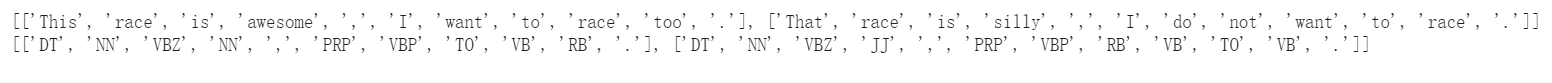

In [306]:
distinct_tags = set(brown_tags) #词性库
sentence =[
    word_tokenize("This race is awesome, I want to race too."),
    word_tokenize("That race is silly, I do not want to race.")
]
sentlen = len(sentence)

# viterbi:
# for each step i in 1 .. sentlen,
# store a dictionary
# that maps each tag X
# to the probability of the best tag sequence of length i that ends in X
viterbi = [ ]

# backpointer:
# for each step i in 1..sentlen,
# store a dictionary
# that maps each tag X
# to the previous tag in the best tag sequence of length i that ends in X
backpointer = [ ]

first_viterbi = { }
first_backpointer = { }
for tag in distinct_tags:
    # don't record anything for the START tag
    if tag == "START": continue
    first_viterbi[ tag ] = cpd_tags["START"].prob(tag) * cpd_tagwords[tag].prob( sentence[0][0] )
    first_backpointer[ tag ] = "START"

print(first_viterbi)
print(first_backpointer)
    
viterbi.append(first_viterbi)
backpointer.append(first_backpointer)

currbest = max(first_viterbi.keys(), key = lambda tag: first_viterbi[ tag ])
print( "Word", "'" + sentence[0][0] + "'", "current best two-tag sequence:", first_backpointer[ currbest], currbest)
# print( "Word", "'" + sentence[0] + "'", "current best tag:", currbest)

for l in range(len(sentence)):
  for wordindex in range(1, l):
      this_viterbi = { }
      this_backpointer = { }
      prev_viterbi = viterbi[-1]
      
      for tag in distinct_tags:
          # don't record anything for the START tag
          if tag == "START": continue

          # if this tag is X and the current word is w, then 
          # find the previous tag Y such that
          # the best tag sequence that ends in X
          # actually ends in Y X
          # that is, the Y that maximizes
          # prev_viterbi[ Y ] * P(X | Y) * P( w | X)
          # The following command has the same notation
          # that you saw in the sorted() command.
          best_previous = max(prev_viterbi.keys(),
                              key = lambda prevtag: \
              prev_viterbi[ prevtag ] * cpd_tags[prevtag].prob(tag) * cpd_tagwords[tag].prob(sentence[wordindex]))

        # Instead, we can also use the following longer code:
        # best_previous = None
        # best_prob = 0.0
        # for prevtag in distinct_tags:
        #    prob = prev_viterbi[ prevtag ] * cpd_tags[prevtag].prob(tag) * cpd_tagwords[tag].prob(sentence[wordindex])
        #    if prob > best_prob:
        #        best_previous= prevtag
        #        best_prob = prob
        #
        this_viterbi[ tag ] = prev_viterbi[ best_previous] * \
            cpd_tags[ best_previous ].prob(tag) * cpd_tagwords[ tag].prob(sentence[wordindex])
        this_backpointer[ tag ] = best_previous

    currbest = max(this_viterbi.keys(), key = lambda tag: this_viterbi[ tag ])
    print( "Word", "'" + sentence[ wordindex] + "'", "current best two-tag sequence:", this_backpointer[ currbest], currbest)
    # print( "Word", "'" + sentence[ wordindex] + "'", "current best tag:", currbest)


    # done with all tags in this iteration
    # so store the current viterbi step
    viterbi.append(this_viterbi)
    backpointer.append(this_backpointer)


# done with all words in the sentence.
# now find the probability of each tag
# to have "END" as the next tag,
# and use that to find the overall best sequence
prev_viterbi = viterbi[-1]
best_previous = max(prev_viterbi.keys(),
                    key = lambda prevtag: prev_viterbi[ prevtag ] * cpd_tags[prevtag].prob("END"))

prob_tagsequence = prev_viterbi[ best_previous ] * cpd_tags[ best_previous].prob("END")

# best tagsequence: we store this in reverse for now, will invert later
best_tagsequence = [ "END", best_previous ]
# invert the list of backpointers
backpointer.reverse()

# go backwards through the list of backpointers
# (or in this case forward, because we have inverter the backpointer list)
# in each case:
# the following best tag is the one listed under
# the backpointer for the current best tag
current_best_tag = best_previous
for bp in backpointer:
    best_tagsequence.append(bp[current_best_tag])
    current_best_tag = bp[current_best_tag]

best_tagsequence.reverse()
print( "The sentence was:", end = " ")
for w in sentence: print( w, end = " ")
print("\n")
print( "The best tag sequence is:", end = " ")
for t in best_tagsequence: print (t, end = " ")
print("\n")
print( "The probability of the best tag sequence is:", prob_tagsequence)


IndentationError: ignored